# Lab | Random Forests

In [1]:
# For this lab, you will be using the CSV files provided in the files_for_lab folder.
# Instructions
# Apply the Random Forests algorithm but this time only by upscaling the data using SMOTE.
# Note that since SMOTE works on numerical data only, we will first encode the categorical variables in this case.

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Import data

categorical = pd.read_csv('categorical.csv')
numerical = pd.read_csv('numerical.csv')
y = pd.read_csv('target.csv')

In [4]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [5]:
numerical.dtypes

TCODE         int64
AGE         float64
INCOME        int64
WEALTH1       int64
HIT           int64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2      int64
Length: 315, dtype: object

In [6]:
y_class = y['TARGET_B']
y_regr = y['TARGET_D']

In [7]:
y_class

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

In [8]:
y_regr

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
95407     0.0
95408     0.0
95409     0.0
95410    18.0
95411     0.0
Name: TARGET_D, Length: 95412, dtype: float64

In [9]:
# Encode the categorical variables.
columns_to_encode = list(categorical.columns)
categorical_encoded = pd.get_dummies(categorical[columns_to_encode])

In [10]:
categorical_encoded

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,36,3,2,89,1,37,12,92,8,94,...,0,0,0,1,0,0,0,0,1,0
1,14,3,1,94,1,52,2,93,10,95,...,1,1,0,0,0,0,0,1,0,0
2,43,3,2,90,1,0,2,91,11,92,...,0,0,0,1,0,0,1,0,0,0
3,44,3,2,87,1,28,1,87,11,94,...,0,0,0,1,0,0,1,0,0,0
4,16,3,2,86,1,20,1,93,10,96,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,27,3,2,96,1,0,2,96,2,96,...,1,0,0,1,0,1,0,0,0,0
95408,24,3,1,96,1,50,1,96,3,96,...,0,1,0,0,0,1,0,0,0,0
95409,30,3,3,95,1,38,1,96,3,95,...,0,0,1,0,0,1,0,0,0,0
95410,24,2,1,86,1,40,5,90,11,96,...,0,1,0,0,0,1,0,0,0,0


In [11]:
# Merge categorical and numerical
X = pd.concat([numerical, categorical_encoded], axis=1)
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0,60.000000,5,9,0,0,39,34,18,10,...,0,0,0,1,0,0,0,0,1,0
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,1,0,0,0,0,0,1,0,0
2,1,61.611649,3,1,2,0,20,29,33,6,...,0,0,0,1,0,0,1,0,0,0
3,0,70.000000,1,4,2,0,23,14,31,3,...,0,0,0,1,0,0,1,0,0,0
4,0,78.000000,3,2,60,1,28,9,53,26,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,1,0,0,1,0,1,0,0,0,0
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,1,0,0,0,1,0,0,0,0
95409,1,60.000000,5,9,0,0,18,46,20,7,...,0,0,1,0,0,1,0,0,0,0
95410,0,58.000000,7,9,0,0,28,35,20,9,...,0,1,0,0,0,1,0,0,0,0


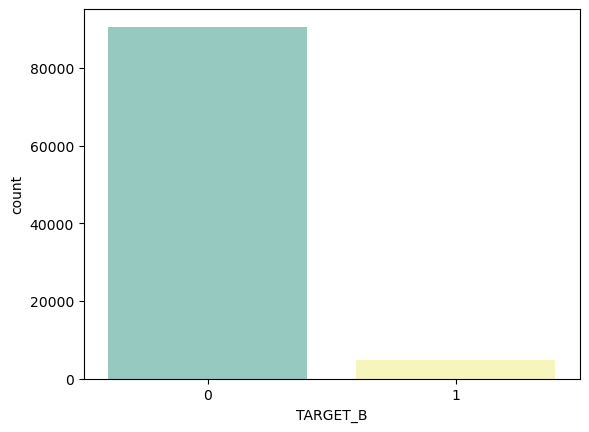

In [12]:
# Check for imbalance and apply SMOTE
sns.countplot(x = y_class, data = X, palette = 'Set3')
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y_class)

<AxesSubplot:xlabel='TARGET_B', ylabel='count'>

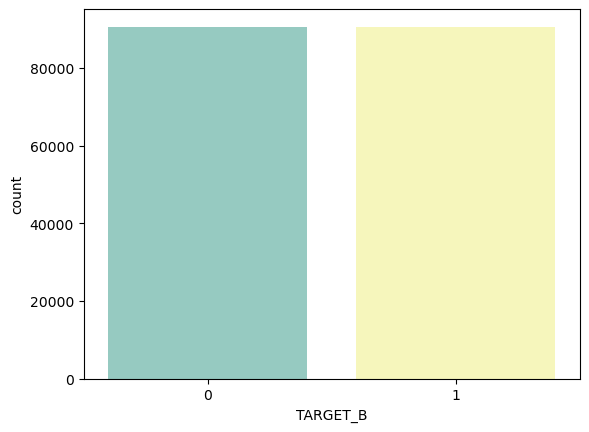

In [13]:
sns.countplot(x = y_sm, data = X_sm, palette = 'Set3')

In [14]:
# Split the data into Train / Test

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=100)

In [15]:
y_test

19121     0
115745    1
177664    1
69605     0
21147     0
         ..
37931     0
135112    1
119120    1
10165     0
170629    1
Name: TARGET_B, Length: 36228, dtype: int64

In [20]:
# Train Random Forest Classifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
r2 = clf2.score(X_test,y_test)
print("R2 Score (Random Forest Classifier):", r2)

R2 Score (Random Forest Classifier): 0.9745776747267307


In [54]:
# Hyperparameter tunning (Grid Search)
n_estimators = [200, 500, 1000, 2000, 4000]
min_samples_split = [2, 4, 8, 16, 32]
min_samples_leaf = [1, 2, 3, 4, 5]
max_features = ['sqrt', 'log2']
max_samples = ['None', 0.5, 0.8]

param_grid = {
    'n_estimators': [50,100],
    'min_samples_split': [2,4],
    'min_samples_leaf':[1,2]   
}

grid_search = GridSearchCV(clf,param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [21]:
# Re-run Random Forrest Classifier using recommended hyperparameters
clf2 = RandomForestClassifier(n_estimators= 100, min_samples_leaf=1, min_samples_split=2, random_state=0)
clf2.fit(X_train, y_train)
r2 = clf2.score(X_test,y_test)
print("R2 Score (Random Forest Classifier):", r2)

R2 Score (Random Forest Classifier): 0.9745776747267307


In [57]:
# Feature Importance
clf.fit(X_train, y_train)
X_train.head()
feature_names = X_train.columns
feature_names = list(feature_names)
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
sorted = df.sort_values(by=['score_feature_importance'], ascending = False)
sorted.head(10)

,columns_name,score_feature_importance
328,FIRSTDATE_YR,0.071589
318,ODATEW_YR,0.059990
344,GENDER_F,0.051694
324,MAXRDATE_YR,0.047454
312,HPHONE_D,0.045118
350,RFA_2A_F,0.044009
351,RFA_2A_G,0.041719
322,MINRDATE_YR,0.038494
325,MAXRDATE_MM,0.037074
327,LASTDATE_MM,0.036469
